## Generating Student's $t$ and $\chi^2$ distributions

The $t$ and $\chi^2$ distributions are important for basic statistical tests, such as quantifying confidence intervals. This notebook is intended to show you how these theoretical probability density functions (PDF's) are related to the sample mean and standard deviation. Using Python, we can randomly sample a normal distribution many times in repeated experiements. The means are distributed like a Student's $t$ distribution. The standard deviations are distributed like a $\chi^2$ distribution. With more and more repeated experiments, the distributions of the means and standard deviations look more and more like the theoretical distributions.

First, import Python libraries. The scipy.stats module has a number of useful probablity distribution functions.

In [6]:
%matplotlib notebook 
import numpy as np   # basic mathematical functions
from scipy.stats import norm, t, chi2      # functions for obtaining properties of different PDFs
from matplotlib import pyplot as plt       # plotting library

Define the parameters of the normal distribution that we are sampling from (true mean $\mu$ and standard deviation $\sigma$), as well as the number of samples in each experiment (N) and the number of experiments. 

In [7]:
mu = 10          # The true mean
sigma = 5        # The true standard deviation
N = 4            # Number of samples
expts = 1000      # Number of repeat experiments, each with N samples

Run the experiments, and compute the $t$ value and $\chi^2$ value of each experiment. For each experiment, there is a $t$ value and $\chi^2$ value

$t = \frac{\bar{x}-\mu}{s\sqrt{1/N}}$

$\chi^2 = \frac{(N-1)s^2}{\sigma^2}$

In [8]:
# initialize variables
tval = np.nan*np.zeros(expts)
chi2val = np.nan*np.zeros(expts)
mn = np.nan*np.zeros(expts)
s = np.nan*np.zeros(expts)
# use a for loop to do all experiments
for ii in np.arange(0,len(chi2val)):
    samples = norm.rvs(mu,sigma,N)    # Generate N random samples
    mn[ii] = np.mean(samples)         # sample mean
    s[ii] = np.std(samples,ddof=1)    # sample standard deviation
    tval[ii] = (mn[ii]-mu)/(s[ii]/N**0.5)     # t value    
    chi2val[ii] = (N-1)*s[ii]**2/sigma**2     # chi-squared value
    # print out the values of the first few experiments (not all of them)
    if ii < 5:
        print('Experiment '+str(ii+1)+' values: '+str(samples)+', t='+str(tval[ii])+', chi2='+str(chi2val[ii]))
print('... '+str(expts)+' experiments total')

Experiment 1 values: [  4.59479628   9.92919323  11.7062477   19.10057404], t=0.444546009373, chi2=4.31394331278
Experiment 2 values: [ 7.5569407   1.84412044  8.73315789  8.0164408 ], t=-2.18703175225, chi2=1.20301001542
Experiment 3 values: [  7.53289353   9.4317376    4.11629641  11.59481158], t=-1.15499663426, chi2=1.20638916313
Experiment 4 values: [ 15.00886845  11.67045958   7.17987045   3.9220485 ], t=-0.22717246688, chi2=2.86172428653
Experiment 5 values: [ 6.6760576   9.97077751 -4.04148458  7.22499793], t=-1.63447244699, chi2=4.56838647903
... 1000 experiments total


Plot the distribution of the means and standard deviations for all experiments.

<IPython.core.display.Javascript object>


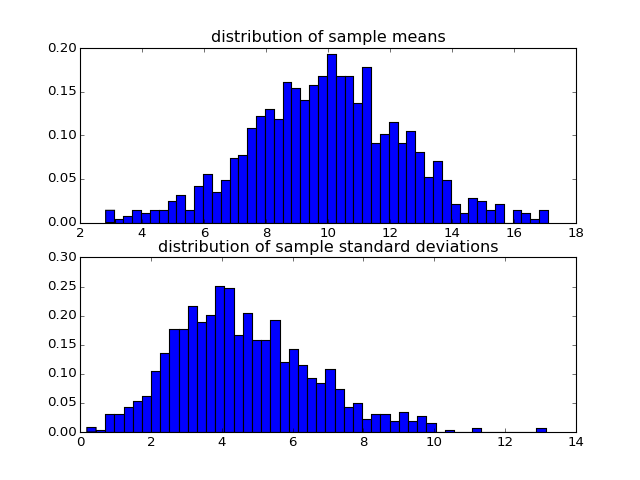

In [9]:
plt.figure() # make a new figure
plt.subplot(211) # start making top plot
plt.hist(mn,50,normed=True)        # make a normalized histogram
plt.title('distribution of sample means')

plt.subplot(212) # start making top plot
plt.hist(s,50,normed=True)        # make a normalized histogram
plt.title('distribution of sample standard deviations')
plt.show()

Plot the distribution of $t$ and $\chi^2$ values from all of the experiments, and compare them with the theoretical distributions (what they would look like if we did an infinite number of experiments).

<IPython.core.display.Javascript object>


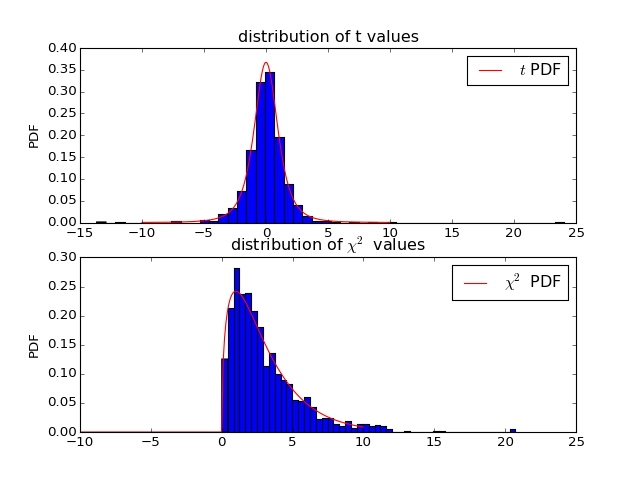

In [10]:
x = np.linspace(-10,10,201) # x axis values for theoretical distributions
plt.figure()
plt.subplot(211) # start making top plot
plt.hist(tval,50,normed=True)        # make a normalized histogram
ln, = plt.plot(x,t.pdf(x,N-1),'r-')  # plot theoretical distribution as a red line
plt.title('distribution of t values')
plt.legend([ln],['$t$ PDF'])
plt.ylabel('PDF')

plt.subplot(212)
plt.hist(chi2val,50,normed=True)
plt.plot(x,chi2.pdf(x,N-1),'r-')
plt.show()
plt.title('distribution of $\chi^2$ values')
plt.legend([ln],['$\chi^2$ PDF'])
plt.ylabel('PDF')
plt.show()